In [217]:
import sqlite3
import pandas as pd
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import csv
stops = set(stopwords.words('english') )
from bokeh.plotting import figure, output_file, show


morph = MorphAnalyzer()

In [218]:
df_csv = pd.read_csv('scooby.csv')
df_csv.dropna(axis = 0, how = 'any', inplace = True)
df_csv.to_csv('scooby.parsed.csv', index = False)

In [219]:
text = ' '.join(df["title"].apply(lemmatize).values)

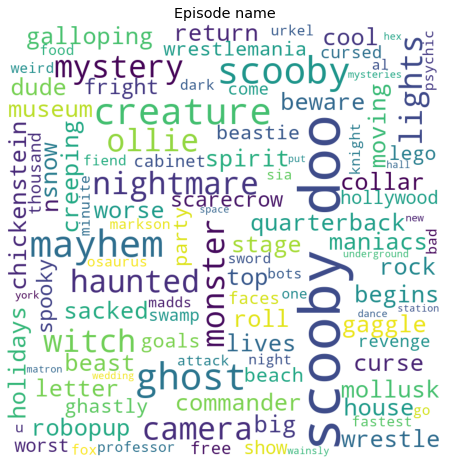

In [220]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            nf = morph.parse(word)[0].normal_form
            if nf not in stops:
                result.append(nf)
    return " ".join(result)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Episode name')
plt.show()



In [221]:
text2 = ' '.join(df["culprit.name"].apply(lemmatize).values)

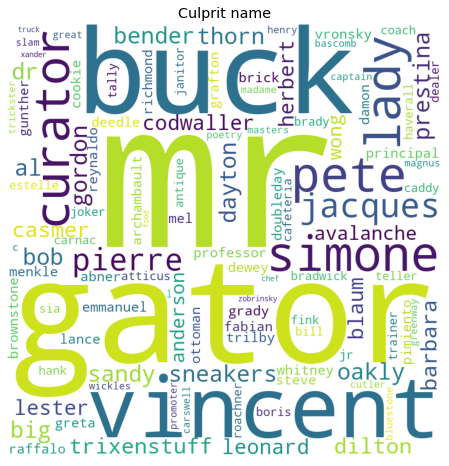

In [222]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text2)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Culprit name')
plt.show()

<AxesSubplot:ylabel='monster.gender'>

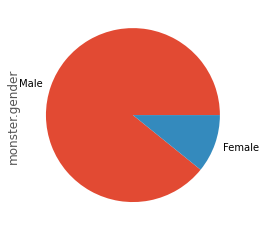

In [223]:
df = pd.read_csv("scooby.parsed.csv", sep=",")
df['monster.gender'].value_counts().head(2).plot.pie()

<AxesSubplot:ylabel='monster.real'>

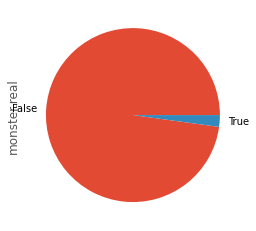

In [224]:
df['monster.real'].value_counts().plot.pie()

<AxesSubplot:ylabel='setting.terrain'>

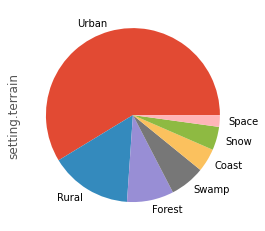

In [225]:
df['setting.terrain'].value_counts().plot.pie()

<AxesSubplot:ylabel='motive'>

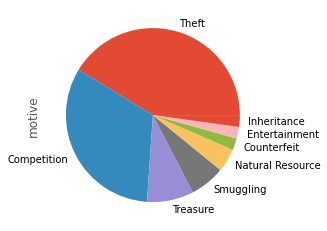

In [226]:
df['motive'].value_counts().plot.pie()

<AxesSubplot:ylabel='monster.type'>

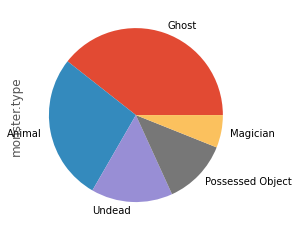

In [227]:
df['monster.type'].value_counts().head(5).plot.pie()

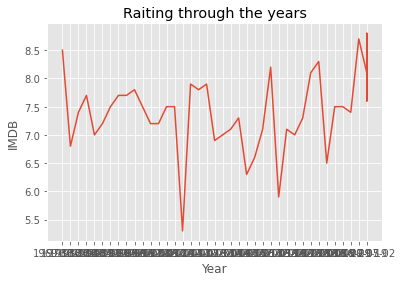

In [228]:


X = df['date.aired']
Y = df['imdb']

plt.plot(X, Y) 
plt.title('Raiting through the years')
plt.ylabel('IMDB')
plt.xlabel('Year') 
plt.show()

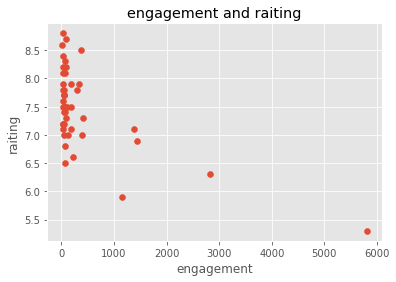

In [229]:
data = pd.read_csv("scooby.parsed.csv")
  
plt.scatter(data['engagement'], data['imdb'])
  
plt.title("engagement and raiting")

plt.xlabel('engagement')
plt.ylabel('raiting')
  
plt.show()

In [230]:
graph = figure(title = "raiting VS suspects amount VS monsters amount")
  
data = pd.read_csv("scooby.parsed.csv")
  
graph.vbar(data['suspects.amount'], top=data['imdb'], 
           legend_label = "raiting VS suspects amount", color='blue')
  
graph.vbar(data['monster.amount'], top=data['imdb'], 
           legend_label = "raiting VS monsters amount", color='purple')
  
graph.legend.click_policy = "hide"

show(graph)

In [231]:
graph = figure(title = "engagement VS suspects amount VS monsters amount")
  
data = pd.read_csv("scooby.parsed.csv")
  
graph.vbar(data['suspects.amount'], top=data['engagement'], 
           legend_label = "engagement VS suspects amount", color='green')
  
graph.vbar(data['monster.amount'], top=data['engagement'], 
           legend_label = "engagement VS monsters amount", color='red')
  
graph.legend.click_policy = "hide"
  
show(graph)